## Using Knn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes.csv')
X = df[['Glucose', 'BloodPressure']]
y = df['Outcome']
X_sc = StandardScaler()
X = X_sc.fit_transform(X)
X = pd.DataFrame(data=X, columns=['Glucose', 'BloodPressure'])

## Train Test Split

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

## Performance Function

In [4]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Deigning Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=7, p=2)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [9]:
print_score(knn, X_train, X_test, y_train, y_test, train = True)
print_score(knn, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.7736

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.90      0.84       401
          1       0.73      0.54      0.63       213

avg / total       0.77      0.77      0.76       614
 

Confusion Metrics : 
 [[359  42]
 [ 97 116]] 

Average Accuracy : 0.7217

Accuracy SD : 0.0444

Test Result : 

Accuracy Score 0.7403

Classification Report : 
              precision    recall  f1-score   support

          0       0.76      0.87      0.81        99
          1       0.68      0.51      0.58        55

avg / total       0.73      0.74      0.73       154


Confusion Metrics : 
 [[86 13]
 [27 28]] 



In [10]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(knn, X_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [11]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

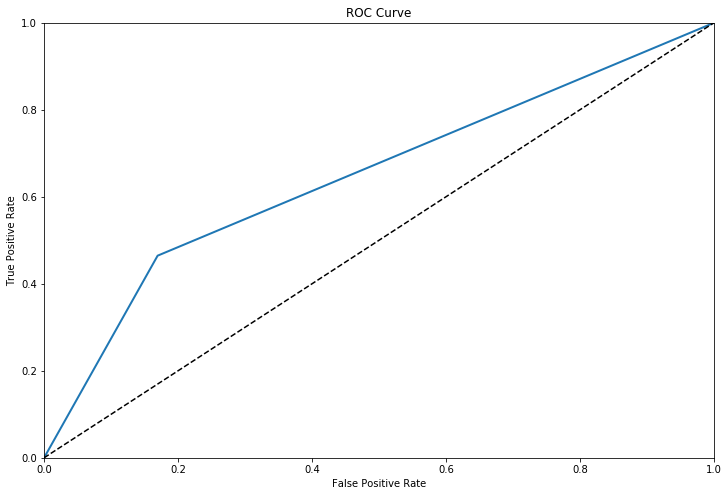

In [12]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();